# Imports and setting up viz

NB : conda env1 on PC, lam1env on spirit (Python3.12)

In [207]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_routing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load and edit files

LAM output analysis.

simu irr et simu no-irr.

## Sims


### LMDZ

In [209]:
TS_flag=False

In [210]:
# noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/noirr_2010_2022'
# irr_dir='../../../JZ_simu_outputs/LAM/LAM_1000_40/irr_2010_2022'
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'

In [211]:
#sim
if TS_flag:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(noirr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(noirr_dir)


sim0 = xr.open_mfdataset(filename)
sim0.attrs['name'] = 'no_irr'
sim = sim0.rename({'time_counter':'time'})
sim.attrs["plot_color"] = 'red'
sim = sim.sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))

sim['evap'] = sim['evap'] *3600 * 24
sim['evap'].attrs['units'] = 'mm/d'
sim['evap'].attrs['long_name'] = 'Evapotranspiration'

sim['precip'] = sim['precip'] *3600 * 24
sim['precip'].attrs['units'] = 'mm/d'
sim['precip'].attrs['long_name'] = 'Total precipitation'

sim['fluxsens']= -sim['sens']

sim['netrad'] = sim['LWdnSFC'] - sim['LWupSFC'] + sim['SWdnSFC'] - sim['SWupSFC']
sim['netrad'].attrs['units'] = 'W/m2'

sim['SWnetSFC'] = sim['SWdnSFC'] - sim['SWupSFC']
sim['SWnetSFC'].attrs['units'] = 'W/m2'

sim['LWnetSFC'] = sim['LWdnSFC'] - sim['LWupSFC']
sim['LWnetSFC'].attrs['units'] = 'W/m2'

sim['P - E'] = sim['precip'] - sim['evap']
sim['P - E'].attrs['units'] = 'mm/d'

sim=compute_grid_cell_width(sim)

if not TS_flag :
    sim['Altitude'] = sim['phis'] / 9.81
    sim['Altitude'].attrs['units'] = 'm'

sim

<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/89)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    aire                  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                    ...
    LWnetSFC              (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    P - E                 (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    cell_width            (time, lat, lon) float32 2.571e+04 ... 2.283e+04
    cell_height           (time, lat, lon) float32 2.676e+04 ... 2.676e+04
    manual_area           (time, lat, lon) float32 6.881e+08 ... 6.108e+08
    Altitude              (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:17:56 GMT
    uuid:         15cc0aab-057e-451b-bf0c-046d80552902
    plot_color:   red

In [212]:
#sim irr
if TS_flag:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(irr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(irr_dir)

sim0irr = xr.open_mfdataset(filename)
sim0irr.attrs['name'] = 'irr'
simirr = sim0irr.rename({'time_counter':'time'})
simirr.attrs["plot_color"] = 'blue'
simirr = simirr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))

simirr['evap'] = simirr['evap'] *3600 * 24
simirr['evap'].attrs['units'] = 'mm/d'

simirr['precip'] = simirr['precip'] *3600 * 24
simirr['precip'].attrs['units'] = 'mm/d'

simirr['fluxsens']= -simirr['sens']

simirr['netrad'] = simirr['LWdnSFC'] - simirr['LWupSFC'] + simirr['SWdnSFC'] - simirr['SWupSFC']
simirr['netrad'].attrs['units'] = 'W/m2'

simirr['SWnetSFC'] = simirr['SWdnSFC'] - simirr['SWupSFC']
simirr['SWnetSFC'].attrs['units'] = 'W/m2'

simirr['LWnetSFC'] = simirr['LWdnSFC'] - simirr['LWupSFC']
simirr['LWnetSFC'].attrs['units'] = 'W/m2'

simirr['P - E'] = simirr['precip'] - simirr['evap']
simirr['P - E'].attrs['units'] = 'mm/d'

simirr=compute_grid_cell_width(simirr)

if not TS_flag:
    simirr['Altitude'] = simirr['phis'] / 9.81
    simirr['Altitude'].attrs['units'] = 'm'

simirr


<xarray.Dataset>
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 35.69 35.93 36.17 ... 43.38 43.62 43.87
  * lon                   (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-...
    time_instant          (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/89)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    aire                  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                    ...
    LWnetSFC              (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    P - E                 (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    cell_width            (time, lat, lon) float32 2.571e+04 ... 2.283e+04
    cell_height           (time, lat, lon) float32 2.676e+04 ... 2.676e+04
    manual_area           (time, lat, lon) float32 6.881e+08 ... 6.108e+08
    Altitude              (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:20:19 GMT
    uuid:         9b14cf09-a875-4aee-8765-fef8fb231424
    plot_color:   blue

### ORC

In [213]:
#open netcdf files
if TS_flag:
    filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)
elif not TS_flag:
    filename = '{}/*/SRF/MO/*sechiba_history.nc'.format(noirr_dir)

ORCnoirr0 = xr.open_mfdataset(filename)
ORCnoirr = ORCnoirr0.rename({'time_counter':'time'})
ORCnoirr.attrs['name'] = 'no_irr'
ORCnoirr.attrs['plot_color'] = "red"
ORCnoirr = ORCnoirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCnoirr['aei_sw'] = ORCnoirr['aei_sw'] * 100

ORCnoirr

<xarray.Dataset>
Dimensions:                 (lat: 35, lon: 49, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2010-01-16T12:00:00 ... 202...
Dimensions without coordinates: axis_nbounds
Data variables: (12/122)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delfastr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:37 GMT
    uuid:         58fb7df4-6705-43ed-8adf-55b70a468dac
    plot_color:   red

In [214]:
if TS_flag:
    filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)
elif not TS_flag:
    filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)

ORCirr0 = xr.open_mfdataset(filename)
ORCirr = ORCirr0.rename({'time_counter':'time'})
ORCirr.attrs['name'] = 'irr'
ORCirr.attrs['plot_color'] = "#0C5DA5"
ORCirr = ORCirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCirr['aei_sw'] = ORCirr['aei_sw'] * 100


ORCirr

<xarray.Dataset>
Dimensions:                 (lat: 35, lon: 49, veget: 15, soiltyp: 3,
                             solth: 18, nobio: 1, solay: 11, snowlev: 3,
                             albtyp: 2, time: 156, axis_nbounds: 2)
Coordinates:
  * lat                     (lat) float32 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 -9.899 -9.615 -9.33 ... 3.468 3.752
  * veget                   (veget) float32 1.0 2.0 3.0 4.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 1.0 2.0 3.0
  * solth                   (solth) float32 0.0004888 0.001955 ... 33.53 65.56
  * nobio                   (nobio) float32 1.0
  * solay                   (solay) float32 0.0 0.001955 0.005865 ... 0.999 2.0
  * snowlev                 (snowlev) float32 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 1.0 2.0
    time_centered           (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 2010-01-16T12:00:00 ... 202...
Dimensions without coordinates: axis_nbounds
Data variables: (12/130)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delfastr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         3b44d854-98f3-4d70-81de-20074bb33431
    plot_color:   #0C5DA5

In [215]:
if not TS_flag:
    # #manually define irrig_deficit as netirrig-irrigation in ORC file
    # ORCirr['irrig_deficit'] = ORCirr['netirrig'] - ORCirr['irrigation']
    # #make irrig_deficit units mm/day
    # ORCirr['irrig_deficit'].attrs['units'] = 'mm/day'
    # ORCirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas']
    ORCnoirr['irrigmap_dyn'] = ORCirr['irrigmap_dyn']

    ORCnoirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas'] * 100
    ORCnoirr['irrig_frac'].attrs['units'] = '%'
    ORCirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas'] * 100
    ORCirr['irrig_frac'].attrs['units'] = '%'

### Routing

In [216]:
rename_dict = {
        'time_counter' : 'time',
        'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_irrigation_r' : 'irrigation',
        'irrig_netereq_r' : 'netirrig'
        }

long_name_dict = {
        'streamr' : 'stream reservoir',
        'fastr' : 'fast reservoir',
        'slowr' : 'slow reservoir',
        'drainage' : 'drainage',
        'runoff' : 'runoff',
        'hydrographs' : 'hydrographs',
        'irrigation' : 'irrigation',
        'netirrig' : 'net irrigation'
        }

In [217]:
# filename = '{}/SRF/MO/sim1*_hydrographs_monthly_*.nc'.format(noirr_dir)
filename = '{}/*/SRF/MO/*diag_routing_r.nc'.format(noirr_dir)
routing_noirr = xr.open_mfdataset(filename)

routing_noirr = routing_noirr.rename(rename_dict)
routing_noirr = routing_noirr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_max, lat_min))

#add long name to variables
for var in routing_noirr.variables:
    if var in long_name_dict.keys():
        routing_noirr[var].attrs['long_name'] = long_name_dict[var]
from dateutil.relativedelta import relativedelta

#move data 1 month back to correct for output file convention
routing_noirr['time'] = routing_noirr['time'].copy(
    data=[(pd.Timestamp(t.item()) - relativedelta(months=1)).to_datetime64() for t in routing_noirr['time'].values]
)

#add unit m³/s to hydrographs
routing_noirr['hydrographs'].attrs['units'] = 'm³/s'

routing_noirr.attrs['name'] = 'noirr'
routing_noirr.attrs['plot_color'] = 'red'

routing_noirr

<xarray.Dataset>
Dimensions:              (lat: 480, lon: 840, basins: 200, time: 156,
                          axis_nbounds: 2)
Coordinates:
  * lat                  (lat) float32 43.99 43.97 43.96 ... 36.04 36.03 36.01
  * lon                  (lon) float32 -9.992 -9.975 -9.958 ... 3.975 3.992
  * basins               (basins) |S255 b'Amazon\x00                         ...
    time_instant         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) datetime64[ns] 2010-01-01 ... 2022-12-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    runoff               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    drainage             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    fastr                (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    ...                   ...
    streamr              (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    hydrographs          (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    netirrig             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    irrigation           (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    basins_riverflow     (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area  (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
Attributes:
    name:         noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:38 GMT
    uuid:         79bcbd35-667a-4675-8cc4-27b750cade0a
    plot_color:   red

In [218]:
filename = '{}/*/SRF/MO/*diag_routing_r.nc'.format(irr_dir)
routing_irr = xr.open_mfdataset(filename)

routing_irr = routing_irr.rename(rename_dict)
routing_irr = routing_irr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_max, lat_min))

#add long name to variables
for var in routing_irr.variables:
    if var in long_name_dict.keys():
        routing_irr[var].attrs['long_name'] = long_name_dict[var]

#move data 1 month back to correct for output file convention
routing_irr['time'] = routing_irr['time'].copy(
    data=[(pd.Timestamp(t.item()) - relativedelta(months=1)).to_datetime64() for t in routing_irr['time'].values]
)

#add unit m³/s to hydrographs
routing_irr['hydrographs'].attrs['units'] = 'm³/s'

routing_irr.attrs['name']='irr'
routing_irr.attrs['plot_color'] = 'blue'

routing_irr

<xarray.Dataset>
Dimensions:              (lat: 480, lon: 840, basins: 200, time: 156,
                          axis_nbounds: 2)
Coordinates:
  * lat                  (lat) float32 43.99 43.97 43.96 ... 36.04 36.03 36.01
  * lon                  (lon) float32 -9.992 -9.975 -9.958 ... 3.975 3.992
  * basins               (basins) |S255 b'Amazon\x00                         ...
    time_instant         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) datetime64[ns] 2010-01-01 ... 2022-12-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    runoff               (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    drainage             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    fastr                (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    ...                   ...
    streamr              (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    hydrographs          (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    netirrig             (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    irrigation           (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    basins_riverflow     (time, basins) float64 dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area  (time, lat, lon) float64 dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         308aaefd-83d8-48ed-9d6c-b3d74350cee0
    plot_color:   blue

## Obs

### GLEAM

In [219]:
filename = '../../../obs/GLEAMv4.1a/E/*'
gleam = xr.open_mfdataset(filename)
gleam.attrs['name'] = 'GLEAMv4.1a'
gleam.attrs['plot_color'] = 'black'
#restrict lon lat
gleam = gleam.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))

gleam['evap']=convert_mm_per_month_to_mm_per_day(gleam['E'])
gleam['evap'].attrs['units'] = 'mm/d'
gleam

<xarray.Dataset>
Dimensions:  (time: 156, lon: 140, lat: 85)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 3.65 3.75 3.85 3.95
  * lat      (lat) float64 43.95 43.85 43.75 43.65 ... 35.85 35.75 35.65 35.55
Data variables:
    E        (time, lat, lon) float32 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
    evap     (time, lat, lon) float64 dask.array<chunksize=(12, 85, 140), meta=np.ndarray>
Attributes:
    name:        GLEAMv4.1a
    plot_color:  black

### GPCC

In [220]:
#gpcc
filename='../../../obs/precips/precip.mon.total.0.25x0.25.v2020.nc'
gpcc0=xr.open_mfdataset(filename)
gpcc0.attrs['name'] = 'GPCC'
gpcc=gpcc0.sel(time=slice(date_min,date_max))
gpcc['lon'] = ((gpcc['lon'] + 180) % 360) - 180
gpcc1 = gpcc.sortby('lon')

# gpcc=gpcc.sel(lon=slice(-13,6.25),lat=slice(lat_min, lat_max))
gpcc=gpcc1.sel(lon=slice(-13,6.25),lat=slice(lat_max, lat_min))

gpcc.attrs["plot_color"] = 'black'

# gpcc1=gpcc.sel(lon=slice(347,360),lat=slice(lat_max, lat_min))
# gpcc2=gpcc.sel(lon=slice(0,6.25),lat=slice(lat_max, lat_min))
# gpcc=xr.combine_by_coords([gpcc1, gpcc2])
# gpcc = gpcc.where(gpcc['lon'] < 6.25, drop=True)

# gpcc['lon']=gpcc['lon']-180.0
# gpcc=gpcc.sel(lon=slice(-13,6.25))

gpcc['precip'] = convert_mm_per_month_to_mm_per_day(gpcc['precip'])
gpcc['precip'].attrs['units'] = 'mm/d'
gpcc

<xarray.Dataset>
Dimensions:  (lat: 34, lon: 77, time: 120)
Coordinates:
  * lat      (lat) float32 43.88 43.62 43.38 43.12 ... 36.38 36.12 35.88 35.62
  * lon      (lon) float32 -12.88 -12.62 -12.38 -12.12 ... 5.625 5.875 6.125
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2019-12-01
Data variables:
    precip   (time, lat, lon) float64 dask.array<chunksize=(120, 34, 77), meta=np.ndarray>
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2020 0.25x0.25 Monthl...
    history:          Created 07/2021  based on V2020 data obtained via wget
    References:       https://www.psl.noaa.gov/data/gridded/data.gpcc.html
    name:             GPCC
    plot_color:       black

### Ebro irrig

In [221]:
load_Ebro_obs=False

In [222]:
if (load_Ebro_obs):
    filename = '../../../obs/SM_based_inversion_approach_EBRO_Irrigation.nc'
    obsEbro = xr.open_dataset(filename)
    obsEbro = obsEbro.rename({'Time':'time'})
    obsEbro = obsEbro.rename({'Longitude':'lon'})
    obsEbro = obsEbro.rename({'Latitude':'lat'})
    obsEbro = obsEbro.rename({'Irrigation':'irrigation'})
    #make lon and lat coordinates and not variables
    # obsEbro = obsEbro.set_coords(['lon','lat'])

    obsEbro = regrid_to_lon_lat(obsEbro)
    obsEbro.attrs['name'] = 'obs_Ebro'
    obsEbro.attrs['plot_color'] = "black"

    #convert to mm/day
    obsEbro['irrigation'] = obsEbro['irrigation']/30
    obsEbro['irrigation'].attrs['units'] = 'mm/d'
    obsEbro['irrigation'].attrs['long_name'] = 'Irrigation'
    
    #resample obsEbro to monthly values
    obsEbro = obsEbro.resample(time='1M').mean()
    
    obsEbro

### Discharge

In [223]:
filename = '../../../obs/streamflow/GRDC-Monthly_Spain.nc'
obs_routing = xr.open_dataset(filename)
obs_routing

<xarray.Dataset>
Dimensions:              (time: 1347, id: 186)
Coordinates:
  * time                 (time) datetime64[ns] 1912-01-01 ... 2024-03-01
  * id                   (id) int32 6226100 6226200 6226210 ... 6228910 6228920
Data variables:
    runoff_mean          (time, id) float32 ...
    flag                 (time, id) float32 ...
    area                 (id) float32 ...
    country              (id) object ...
    geo_x                (id) float32 ...
    geo_y                (id) float32 ...
    geo_z                (id) float32 ...
    owneroforiginaldata  (id) object ...
    river_name           (id) object ...
    station_name         (id) object ...
    timezone             (id) float32 ...
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 26/06/2024
    missing_value:  -999.000

## Masking, interpolation, and time period selection

### Sim masks

In [224]:
#continental fraction mask (LMDZ outputs)
con_mask=sim.mean(dim='time')['contfracOR']>0.95
ip_mask=polygon_to_mask(sim, iberian_peninsula) * con_mask

In [225]:
ip_sim = sim.where(ip_mask, drop=False)
ip_simirr = simirr.where(ip_mask, drop=False)

In [226]:
ip_ORCirr=ORCirr.where(ip_mask, drop=False)
ip_ORCnoirr=ORCnoirr.where(ip_mask, drop=False)

### Interpolation and filtering of products

In [227]:
if (load_Ebro_obs):
    ebro_mask = obsEbro['irrigation']>0
    ORCirr_iObsEbro = ORCirr.interp_like(obsEbro)
    ebro_ORCirr_iObsEbro = ORCirr_iObsEbro.where(ebro_mask)
    obsEbro_iORC = obsEbro.interp_like(ORCirr)
    ebro_mask_iORCirr = obsEbro_iORC['irrigation']>0
    ebro_ORCirr = ORCirr.where(ebro_mask_iORCirr)

In [228]:
#gleam
gleam_isim=gleam.interp_like(sim)
cont_gleam_isim=gleam_isim.where(con_mask)
ip_gleam_isim = cont_gleam_isim.where(ip_mask, drop=False)

In [229]:
#gpcc
gpcc_isim=gpcc.interp_like(sim)
cont_gpcc_isim=gpcc_isim.where(con_mask)
ip_gpcc_isim = cont_gpcc_isim.where(ip_mask, drop=False)

# Figures

## Fig 1 : domaine et altitude

In [230]:
import psyplot.project as psy
psy.rcParams['auto_show'] = True
mpl.rcParams['figure.figsize'] = [10., 8.]

In [231]:
LAM_dir='../../../JZ_simu_outputs/LAM/native_outputs/'
start_file='{}/espagne_start_2010.nc'.format(LAM_dir)
start=xr.open_dataset(start_file)
start

<xarray.Dataset>
Dimensions:          (cell_mesh: 10981, nvertex_mesh: 6, lev: 79, nq: 4,
                      cell_u: 33306, nvertex_u: 2)
Coordinates:
    lat_mesh         (cell_mesh) float64 ...
    lon_mesh         (cell_mesh) float64 ...
  * lev              (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 76.0 77.0 78.0 79.0
  * nq               (nq) float64 1.0 2.0 3.0 4.0
    lat_u            (cell_u) float64 ...
    lon_u            (cell_u) float64 ...
Dimensions without coordinates: cell_mesh, nvertex_mesh, cell_u, nvertex_u
Data variables: (12/20)
    bounds_lon_mesh  (cell_mesh, nvertex_mesh) float64 ...
    bounds_lat_mesh  (cell_mesh, nvertex_mesh) float64 ...
    bounds_lon_u     (cell_u, nvertex_u) float64 ...
    bounds_lat_u     (cell_u, nvertex_u) float64 ...
    iteration        float32 ...
    q                (nq, lev, cell_mesh) float64 ...
    ...               ...
    ulat             (lev, cell_mesh) float64 ...
    p                (lev, cell_mesh) float64 ...
    H2O_g            (lev, cell_mesh) float64 ...
    H2O_l            (lev, cell_mesh) float64 ...
    H2O_s            (lev, cell_mesh) float64 ...
    Aga              (lev, cell_mesh) float64 ...
Attributes:
    name:         start0
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Sep-26 08:03:20 GMT
    uuid:         38358204-1468-44e9-bf64-f76b29977695

In [232]:
start["Altitude"] = start["phis"]/9.81
start["Altitude"].attrs["units"] = "m"
start["Altitude"].attrs["long_name"] = "Altitude"
start["Altitude"].attrs["standard_name"] = "Altitude"

start_file2='{}/espagne_start_2010_modified.nc'.format(LAM_dir)
start.to_netcdf(start_file2)

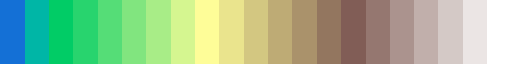

In [233]:
# Custom colormap
terrain_colors = plt.cm.terrain(np.linspace(0, 1, 25))
filtered_colors = terrain_colors[5:]  
# Insert blue as the first color
filtered_colors = np.vstack([[0.07973856209150328, 0.44052287581699345, 0.8405228758169935, 1.0], filtered_colors]) 
custom_colormap = ListedColormap(filtered_colors)
# custom_colormap.set_under('lightblue')  # Define blue for out-of-range low values
custom_colormap

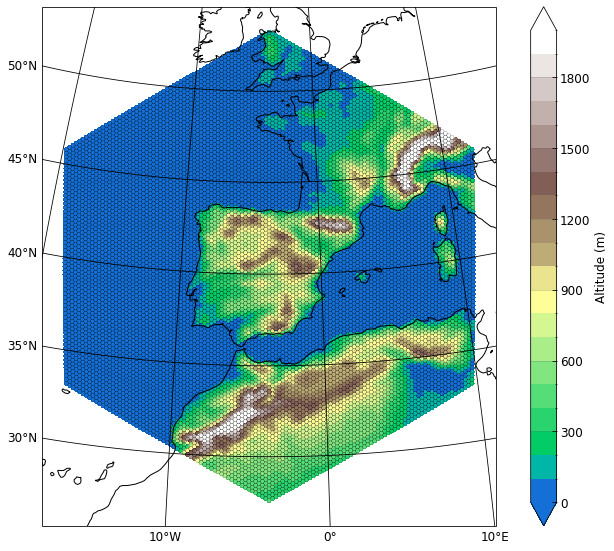

In [234]:
file=start_file2
var='Altitude'
vmin=-0
vmax=2000
pas=(vmax-vmin) / 20

map=psy.plot.mapplot(
    file, 
    name=var,
    datagrid=dict(color='k', linewidth=0.2),
    cbar='r',
    tight=True,
    lsm='50m',
    cmap=custom_colormap,
    extend='both',
    projection='ortho',
    xgrid=True,ygrid=True,
    bounds=np.arange(vmin, vmax + pas, pas),
    # title=var,
    clabel="Altitude (m)"
)

## Fig 2 : stations et barrages

In [235]:
proper_stations_dict = {
    6226800: {'name': 'Tortosa',            'river': 'Ebro',            'lat_grid': 40.82500,   'lon_grid': 0.525007,   'station_nb': 1},
    6226400: {'name': 'Zaragoza',           'river': 'Ebro',            'lat_grid': 41.67499,   'lon_grid': -0.90832,   'station_nb': 2},
    6226300: {'name': 'Castejon',           'river': 'Ebro',            'lat_grid': 42.17499,   'lon_grid': -1.69165,   'station_nb': 3},
    6226600: {'name': 'Seros',              'river': 'Segre',           'lat_grid': 41.45833,   'lon_grid': 0.425007,   'station_nb': 4},
    6226650: {'name': 'Fraga',              'river': 'Cinca',           'lat_grid': 41.52499,   'lon_grid': 0.341674,   'station_nb': 5},
    6212410: {'name': 'Tore',               'river': 'Douro',           'lat_grid': 41.50833,   'lon_grid': -5.47499,   'station_nb': 6},
    6212700: {'name': 'Peral De Arlanza',   'river': 'Arlanza',         'lat_grid': 42.07500,   'lon_grid': -4.07499,   'station_nb': 7},
    6213700: {'name': 'Talavera',           'river': 'Tagus',           'lat_grid': 39.95833,   'lon_grid': -4.82499,   'station_nb': 8},
    6213800: {'name': 'Trillo',             'river': 'Tagus',           'lat_grid': 40.70833,   'lon_grid': -2.57499,   'station_nb': 9},
    6213900: {'name': 'Peralejos',          'river': 'Tagus',           'lat_grid': 40.59166,   'lon_grid': -1.92499,   'station_nb': 10},
    6216510: {'name': 'Azud de Badajoz',    'river': 'Guadiana',        'lat_grid': 38.86199,   'lon_grid': -7.01,      'station_nb': 11}, 
    6116200: {'name': 'Pulo do Lobo',       'river': 'Guadiana',        'lat_grid': 37.803,     'lon_grid': -7.633,     'station_nb': 12},         
    6216530: {'name': 'La Cubeta',          'river': 'Guadiana',        'lat_grid': 38.975,     'lon_grid': -2.895,     'station_nb': 13},         
    6216520: {'name': 'Villarubia',         'river': 'Guadiana',        'lat_grid': 39.125,     'lon_grid': -3.59073,   'station_nb': 14},      
    6216800: {'name': 'Quintanar',          'river': 'Giguela',         'lat_grid': 39.64166,   'lon_grid': -3.07499,   'station_nb': 15},
    6217140: {'name': 'Mengibar',           'river': 'Guadalquivir',    'lat_grid': 37.98425,   'lon_grid': -3.79939,   'station_nb': 16},     
    6217200: {'name': 'Arroyo Maria',       'river': 'Guadalquivir',    'lat_grid': 38.17905,   'lon_grid': -2.83594,   'station_nb': 17}, 
    6217700: {'name': 'Pinos Puente',       'river': 'Frailes',         'lat_grid': 37.27499,   'lon_grid': -3.75832,   'station_nb': 18},
}

#keeping only 3 representative stations for 3 larger rivers, for simple figure
#keep only first 3 stations of proper_stations_dict
# representative_stations_dict = dict(list(proper_stations_dict.items())[:5])
representative_stations_dict = {
    6226800: {'name': 'Tortosa',            'river': 'Ebro',            'lat_grid': 40.82500,   'lon_grid': 0.525007,   'station_nb': 1},
    6212410: {'name': 'Tore',               'river': 'Douro',           'lat_grid': 41.50833,   'lon_grid': -5.47499,   'station_nb': 6},
    6213700: {'name': 'Talavera',           'river': 'Tagus',           'lat_grid': 39.95833,   'lon_grid': -4.82499,   'station_nb': 8},
    6216510: {'name': 'Azud de Badajoz',    'river': 'Guadiana',        'lat_grid': 38.86199,   'lon_grid': -7.01,      'station_nb': 11}, 
    6217140: {'name': 'Mengibar',           'river': 'Guadalquivir',    'lat_grid': 37.98425,   'lon_grid': -3.79939,   'station_nb': 16},     
}

In [236]:
filename='../../../obs/Europe-dams_edited.ods'
dams = pd.read_excel(filename, engine='odf')
mask = dams['Country']=='Spain'
dams = dams[mask]
rename_dict = {
    'Name of dam': 'Name',
    'Decimal degree latitude': 'lat',
    'Decimal degree longitude': 'lon',
    'Reservoir capacity (million m3)' : 'capacity'
}
dams.rename(columns=rename_dict, inplace=True)

#filter dams to keep only the biggest in Reservoir capacity (million m3) 
# dams=dams.nlargest(50, 'capacity')
dams

Country                        Name         Alternate dam name  \
1     Spain                   La Serena                        NaN   
2     Spain                 Alcantara 2  Salto Jose Maria de Oriol   
3     Spain                    Almendra                        NaN   
4     Spain                      Cijara                        NaN   
5     Spain                     Buendia                        NaN   
..      ...                         ...                        ...   
300   Spain                    Taibilla                        NaN   
301   Spain                        Pias                        NaN   
302   Spain  Monteagudo de las Vicarias                        NaN   
303   Spain          San Lorenzo Mongay                        NaN   
304   Spain             Valdecaballeros                        NaN   

    AdministrativeUnit                Nearest city        River  \
1              Badajoz                    Castuera        Zujar   
2                  NaN                   Alcantara         Tajo   
3            Salamanca                    Almendra       Tormes   
4              Caceres                        Alia     Guadiana   
5          Guadalajara                     Buendia     Guadiela   
..                 ...                         ...          ...   
300           Albacete                      Nerpio     Taibilla   
301             Orense               Viana do Bolo        Bibey   
302              Soria  Monteagudo de las Vicarias       Najima   
303             Lerida                    Camarasa        Segre   
304            Badajoz             Valdecaballeros  Guadalupejo   

     Completed /operational since  Dam height (m)  capacity  \
1                            1989            88.0    3231.8   
2                            1969           135.0    3162.0   
3                            1970           202.0    2648.6   
4                            1956            81.0    1640.0   
5                            1957            79.0    1638.7   
..                            ...             ...       ...   
300                          1973            39.0      10.0   
301                          1961            47.0       9.8   
302                          1982            12.0       9.7   
303                          1930            25.0       9.5   
304                          1984            36.0       7.1   

     Reservoir area (km2)  ... Water supply Flood control  \
1                    93.1  ...          NaN           NaN   
2                    45.3  ...          NaN           NaN   
3                    37.0  ...          NaN           NaN   
4                    30.2  ...          NaN           NaN   
5                    32.4  ...          NaN           NaN   
..                    ...  ...          ...           ...   
300                   0.4  ...            x           NaN   
301                   0.5  ...          NaN           NaN   
302                   1.2  ...          NaN           NaN   
303                   0.8  ...          NaN           NaN   
304                   0.7  ...            x           NaN   

    Hydroelectricity (MW) Navigation Recreation Pollution control  \
1                       x        NaN        NaN               NaN   
2                       x        NaN        NaN               NaN   
3                       x        NaN        NaN               NaN   
4                       x        NaN        NaN               NaN   
5                       x        NaN        NaN               NaN   
..                    ...        ...        ...               ...   
300                   NaN        NaN        NaN               NaN   
301                     x        NaN        NaN               NaN   
302                   NaN        NaN        NaN               NaN   
303                     x        NaN        NaN               NaN   
304                   NaN        NaN        NaN               NaN   

     Livestock rearing  Other        la

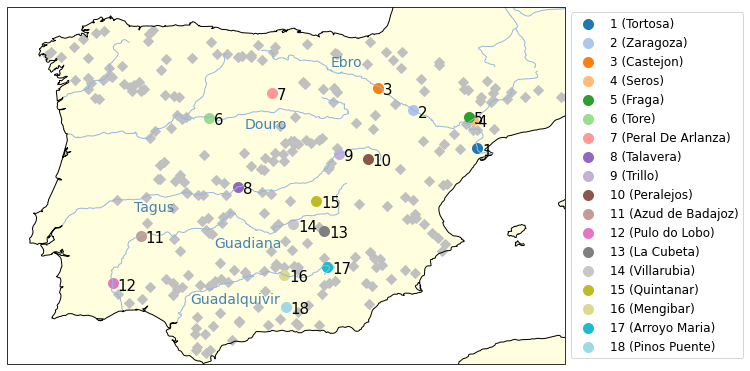

In [237]:
stations_map_dict(proper_stations_dict, river_cond=None, legend=True,
                            dams_df=dams, dam_nb=252, title=None,
                            extent=[-10, 2.5, 36, 44]
                            )

## Fig 3 : irrigation maps

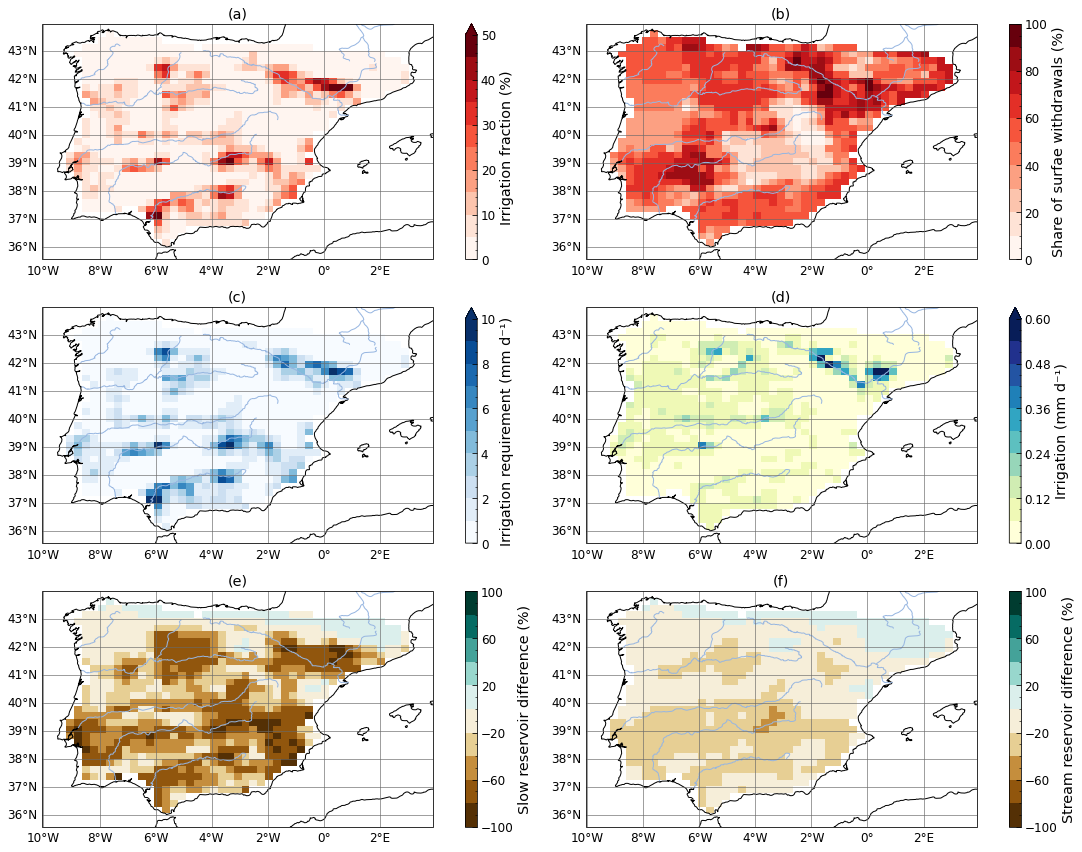

In [238]:
vars=['irrig_frac', 'aei_sw', 'netirrig', 'irrigation', 'slowr', 'streamr']
cmaps=[reds, reds, blues, wet, emb_neutral, emb_neutral]
vmins=[0, 0, 0, 0, -100, -100]
vmaxs=[50, 100, 10, 0.6, 100, 100]
clabels=['Irrigation fraction (%)',
         'Share of surfae withdrawals (%)',
         'Irrigation requirement (mm d⁻¹)',
         'Irrigation (mm d⁻¹)',
         'Slow reservoir difference (%)',
         'Stream reservoir difference (%)']

fig, axes = plt.subplots(3, 2, figsize=(17,12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for i in range(4):
    var=vars[i]
    plotvar=ip_ORCirr[var].mean(dim='time')
    ax=axes[i]
    cmap=cmaps[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    # ax.add_feature(cfeature.RIVERS)
    nice_map(plotvar, ax, cmap, vmin, vmax, clabel=clabel)
    title='({})'.format(letters[i])
    ax.set_title(title)

for i in range(4, 6):
    var=vars[i]
    rel_diff = (ip_ORCirr[var] - ip_ORCnoirr[var]).mean(dim='time') / ip_ORCnoirr[var].mean(dim='time') * 100
    plotvar= rel_diff
    ax=axes[i]
    cmap=cmaps[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    nice_map(plotvar, ax, cmap, vmin, vmax, clabel=clabel)
    #add rivers
    # ax.add_feature(cfeature.RIVERS)
    title='({})'.format(letters[i])
    ax.set_title(title)

## Fig 4 : irrig eval vs obs_Ebro (Dari et al)

In [239]:
var='irrigation'
ds1=obsEbro.sel(time=slice('2016-01-01','2020-07-31'))
ds2=ebro_ORCirr_iObsEbro.sel(time=slice('2016-01-01','2020-07-31'))

NameError: name 'obsEbro' is not defined

In [ ]:
#horizontal version
fig = plt.figure(figsize=(18, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  

# Seasonal cycle
ax1 = fig.add_subplot(gs[0, 0])
ylabel = 'Irrigation (mm d⁻¹)'

plotvar1 = ds1[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color1 = 'black'
label1 = 'obs_Ebro'
nice_time_plot(plotvar1, ax1, label=label1, color=color1, ylabel=ylabel)

plotvar2 = ds2[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color2 = 'blue'
label2 = 'irr'
nice_time_plot(plotvar2, ax1, label=label2, color=color2, ylabel=ylabel)

ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(months_name_list)
ax1.set_title('(a)')

# Map with PlateCarree projection
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree()) 
plotvar = ds2[var].mean(dim='time') - ds1[var].mean(dim='time')
cmap = emb_neutral
vmin = -0.5
vmax = 0.5
clabel = 'Irrigation bias (mm d⁻¹)'

nice_map(plotvar, ax2, cmap, vmin, vmax, clabel=clabel)
ax2.set_title('(b)')

plt.tight_layout()

In [ ]:
#vertical version
fig = plt.figure(figsize=(8.5, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

# Seasonal cycle
ax1 = fig.add_subplot(gs[0, 0])  # Regular Cartesian plot
ylabel = 'Irrigation (mm d⁻¹)'

plotvar1 = ds1[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color1 = 'black'
label1 = 'obs_Ebro'
nice_time_plot(plotvar1, ax1, label=label1, color=color1, ylabel=ylabel)

plotvar2 = ds2[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color2 = 'blue'
label2 = 'irr'
nice_time_plot(plotvar2, ax1, label=label2, color=color2, ylabel=ylabel)

ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(months_name_list)
ax1.set_title('(a)')

# Map with PlateCarree projection
ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plotvar = (ds2[var] - ds1[var]).mean(dim='time')
cmap = emb_neutral
vmin = -0.5
vmax = 0.5
clabel = 'Irrigation bias (mm d⁻¹)'

nice_map(plotvar, ax2, cmap, vmin, vmax, clabel=clabel)
ax2.set_title('(b)')

plt.tight_layout()

## Fig 5 : 5 stations

In [ ]:
#plot a time series for each station from representative_stations_dict
fig, axes= plt.subplots(5,1, figsize=(10,25))
axes= axes.flatten()
ds_list=[routing_noirr, routing_irr]
for i, (station_id, station_data) in enumerate(representative_stations_dict.items()):
    title_letter=letters[i]
    # ts_station(obs_routing,axes[i], station_id, name=station_data['name'], ylabel='River discharge (m³/s)', year_min=2010, year_max=2022)
    # ts_with_obs(ds_list, obs_routing, axes[i], station_id, station_data, ylabel='River discharge (m³/s)', year_min=2010, year_max=2022)
    sc_station(obs_routing,axes[i], station_id, name=station_data['name'], ylabel='River discharge (m³ s⁻¹)', year_min=2010, year_max=2022)
    sc_with_obs(ds_list, obs_routing, axes[i], station_id, station_data, ylabel='River discharge (m³ s⁻¹)', year_min=2010, year_max=2022, title_letter=title_letter)

## Fig 6 : ET and P eval vs GPCC and GLEAM

In [ ]:
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[1.1,1,1.2], height_ratios=[1, 1])

#precip
date_min = '2010-01-01'
date_max = '2019-12-31'
ds_obs=ip_gpcc_isim.sel(time=slice(date_min,date_max))
ds_irr=ip_simirr.sel(time=slice(date_min,date_max))
ds_noirr=ip_sim.sel(time=slice(date_min,date_max))
var='precip'
# Seasonal cycle
ax1 = fig.add_subplot(gs[0,0])
ylabel="Precipitation (mm d⁻¹)"
plotvar1 = ds_obs[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color1 = 'black'
label1 = 'GPCC'
nice_time_plot(plotvar1, ax1, vmin=0, label=label1, color=color1, ylabel=ylabel)
plotvar2 = ds_noirr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color2 = 'red'
label2 = 'no_irr'
nice_time_plot(plotvar2, ax1, vmin=0, label=label2, color=color2, ylabel=ylabel)
plotvar3 = ds_irr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color3 = 'blue'
label3 = 'irr'
nice_time_plot(plotvar3, ax1, vmin=0, vmax=3.5, label=label3, color=color3, ylabel=ylabel)
ax1.set_title('(a) Mean seasonnal cycle (2010-2019)')
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(months_name_list)

#Diff
ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
plotvar=(ds_noirr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=-2
vmax=2
clabel="Precipitation bias (mm d⁻¹)"
nice_map(plotvar, ax2, cmap, vmin, vmax, clabel=clabel, cbar_on=False)
ax2.set_title('(b) no_irr - GPCC')

ax3 = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
plotvar=(ds_irr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=-2
vmax=2
clabel="Precipitation bias (mm d⁻¹)"
nice_map(plotvar, ax3, cmap, vmin, vmax, clabel=clabel, left_labels=False)
ax3.set_title('(c) irr - GPCC')


# #ET
date_min = '2010-01-01'
date_max = '2022-12-31'
ds_obs=ip_gleam_isim.sel(time=slice(date_min,date_max))
ds_irr=ip_simirr.sel(time=slice(date_min,date_max))
ds_noirr=ip_sim.sel(time=slice(date_min,date_max))
var='evap'
# Seasonal cycle
ax4 = fig.add_subplot(gs[1,0])
vmin=0
ylabel="Evapotranspiration (mm d⁻¹)"
plotvar1 = ds_obs[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color1 = 'black'
label1 = 'GLEAM'
nice_time_plot(plotvar1, ax4, vmin=0, label=label1, color=color1, ylabel=ylabel)
plotvar2 = ds_noirr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color2 = 'red'
label2 = 'no_irr'
nice_time_plot(plotvar2, ax4, vmin=0, label=label2, color=color2, ylabel=ylabel)
plotvar3 = ds_irr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color3 = 'blue'
label3 = 'irr'
nice_time_plot(plotvar3, ax4, vmin=0, vmax=2.5, label=label3, color=color3, ylabel=ylabel)
ax4.set_title('(d) Mean seasonnal cycle (2010-2022)')
ax4.set_xticks(np.arange(1, 13))
ax4.set_xticklabels(months_name_list)

#Diff
ax5 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
plotvar=(ds_noirr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=-1
vmax=1
clabel="Evapotranspiration bias (mm d⁻¹)"
nice_map(plotvar, ax5, cmap, vmin, vmax, clabel=clabel, cbar_on=False)
ax5.set_title('(e) no_irr - GLEAM')

ax6 = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
plotvar=(ds_irr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=-1
vmax=1
clabel="Evapotranspiration bias (mm d⁻¹)"
nice_map(plotvar, ax6, cmap, vmin, vmax, clabel=clabel, left_labels=False)
ax6.set_title('(f) irr - GLEAM')

plt.tight_layout()

## Fig 7 : diffs irr - no_irr

In [ ]:
vars=['fluxlat', 'fluxsens', 'rh2m', 't2m', 's_lcl', 's_pblh', 'cape', 'precip']
vmins=[-50, -50, -5.5, -0.35, -250, -100, -35, -1]
vmaxs=[ 50,  50,  5.5,  0.35,  250,  100,  35,  1]
clabels=['Latent heat flux change (W m⁻²)',
         'Sensible heat flux change (W m⁻²)',
         '2-m relative humidity change (%)',
         '2-m temperature change (K)',
         'LCL change (m)',
         'PBL height change (m)',
         'CAPE change (J kg⁻¹)',
         'Precipitation change (mm d⁻¹)']
cmap=emb_neutral

fig, axes = plt.subplots(4, 2, figsize=(17,16), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()


pvalue=0.05
sig_method=1
check_norm=False
sig_viz=6
hatch='///'

months=[6, 7, 8]

for i in range(2):
    ds1=ip_ORCirr.sel(time=ip_ORCirr['time.month'].isin(months))
    ds2=ip_ORCnoirr.sel(time=ip_ORCnoirr['time.month'].isin(months))
    var=vars[i]
    diff = (ds1[var] - ds2[var]).mean(dim='time')
    plotvar= diff
    ax=axes[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    sig_mask = compute_sig_mask(ds1, ds2, var, check_norm=check_norm, method=sig_method, pvalue=pvalue)
    nice_map(plotvar, ax, cmap, vmin, vmax, sig_mask=sig_mask, clabel=clabel, hatch=hatch)
    #add rivers
    # ax.add_feature(cfeature.RIVERS)
    title='({})'.format(letters[i])
    ax.set_title(title)

for i in range(2, 8):
    ds1=ip_simirr.sel(time=ip_simirr['time.month'].isin(months))
    ds2=ip_sim.sel(time=ip_sim['time.month'].isin(months))
    var=vars[i]
    diff = (ds1[var] - ds2[var]).mean(dim='time')
    plotvar= diff
    ax=axes[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    sig_mask = compute_sig_mask(ds1, ds2, var, check_norm=check_norm, method=sig_method, pvalue=pvalue)
    nice_map(plotvar, ax, cmap, vmin, vmax, sig_mask=sig_mask, clabel=clabel, hatch=hatch)
    title='({})'.format(letters[i])
    ax.set_title(title)

## Fig 8 : Scatter plot ET and P

In [111]:
ds1=ip_ORCirr.mean(dim=['lon', 'lat'])
ds2=(ip_ORCirr - ip_ORCnoirr).mean(dim=['lon', 'lat'])

In [ ]:
fig, axes= plt.subplots(1,2, figsize=(18,6))
axes=axes.flatten()
var1='irrigation'
xlabel='Irrigation (mm d⁻¹)'
seasons=['MAM', 'JJA', 'SON']

#evap vs irrig
ax=axes[0]
var2='evap'
ylabel='Evapotranspiration change (mm d⁻¹)'
title='(a)'
scatter_vars_seasons_ax(ax,ds1, ds2, var1, var2, reg=True, plot_one=True, title=title, coloring=True,
                      is_1D=True, seasons_list=seasons, xlabel=xlabel, ylabel=ylabel)
#precip vs irrig
ax=axes[1]
var2='rain'
ylabel='Precipitation change (mm d⁻¹)'
title='(b)'
scatter_vars_seasons_ax(ax,ds1, ds2, var1, var2, reg=True, plot_one=True, title=title, coloring=True,
                      is_1D=True, seasons_list=seasons, xlabel=xlabel, ylabel=ylabel)

## Fig 9 : Moisture budget by zone

### Define datasets and masks

In [168]:
# Define 2D masks
# Applied irrigation
irr_mask_low    = ip_ORCirr.mean(dim='time')['irrigation']<0.05
irr_mask_high   = ip_ORCirr.mean(dim='time')['irrigation']>0.1
irr_mask_med    = (~irr_mask_low) * (~irr_mask_high) * ip_mask

In [169]:
# Define datasets orc
lowirr_ip_ORCnoirr = apply_2Dmask_to_dataset(ip_ORCnoirr, irr_mask_low, dsname='lowirr_noirr')
lowirr_ip_ORCirr = apply_2Dmask_to_dataset(ip_ORCirr, irr_mask_low, dsname='lowirr_irr')

medirr_ip_ORCnoirr = apply_2Dmask_to_dataset(ip_ORCnoirr, irr_mask_med, dsname='medirr_noirr')
medirr_ip_ORCirr = apply_2Dmask_to_dataset(ip_ORCirr, irr_mask_med, dsname='medirr_irr')

highirr_ip_ORCnoirr = apply_2Dmask_to_dataset(ip_ORCnoirr, irr_mask_high, dsname='highirr_noirr')
highirr_ip_ORCirr = apply_2Dmask_to_dataset(ip_ORCirr, irr_mask_high, dsname='highirr_irr')

In [174]:
# Temporal and spatial mean 
# for IP
ip_ORCnoirr_mean = ip_ORCnoirr.mean(dim=['time','lon','lat'])
ip_ORCirr_mean = ip_ORCirr.mean(dim=['time','lon','lat'])

#by irrig class
lowirr_ip_ORCnoirr_mean     = lowirr_ip_ORCnoirr.mean(dim=['time','lon','lat'])
lowirr_ip_ORCirr_mean       = lowirr_ip_ORCirr.mean(dim=['time','lon','lat'])
medirr_ip_ORCnoirr_mean     = medirr_ip_ORCnoirr.mean(dim=['time','lon','lat'])
medirr_ip_ORCirr_mean       = medirr_ip_ORCirr.mean(dim=['time','lon','lat'])
highirr_ip_ORCnoirr_mean    = highirr_ip_ORCnoirr.mean(dim=['time','lon','lat'])
highirr_ip_ORCirr_mean      = highirr_ip_ORCirr.mean(dim=['time','lon','lat'])

In [176]:
#diff
#over whole IP
ip_orc_diff_mean = ip_ORCirr_mean - ip_ORCnoirr_mean

#by irrig class
lowirr_ip_orc_diff_mean     = lowirr_ip_ORCirr_mean - lowirr_ip_ORCnoirr_mean
medirr_ip_orc_diff_mean     = medirr_ip_ORCirr_mean - medirr_ip_ORCnoirr_mean
highirr_ip_orc_diff_mean    = highirr_ip_ORCirr_mean -  highirr_ip_ORCnoirr_mean

### Compute and display data

In [240]:
compute_dict=False

In [241]:
if compute_dict:
    data_dict = {
        "Variable": ["Irrigation",  "ET change","P change"],
        "Low irrigation":               [0,0,0],
        "Medium irrigation":            [0,0,0],
        "High irrigation":              [0,0,0],
        "Iberian Peninsula":            [0,0,0]
    }
    # add average values for irrigation, ET chang and P change to dictionary
    data_dict['Low irrigation'][0] = lowirr_ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['Low irrigation'][1] = lowirr_ip_orc_diff_mean['evap'].compute().item()
    data_dict['Low irrigation'][2] = lowirr_ip_orc_diff_mean['rain'].compute().item()

    data_dict['Medium irrigation'][0] = medirr_ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['Medium irrigation'][1] = medirr_ip_orc_diff_mean['evap'].compute().item()
    data_dict['Medium irrigation'][2] = medirr_ip_orc_diff_mean['rain'].compute().item()

    data_dict['High irrigation'][0] = highirr_ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['High irrigation'][1] = highirr_ip_orc_diff_mean['evap'].compute().item()
    data_dict['High irrigation'][2] = highirr_ip_orc_diff_mean['rain'].compute().item()

    data_dict['Iberian Peninsula'][0] = ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['Iberian Peninsula'][1] = ip_orc_diff_mean['evap'].compute().item()
    data_dict['Iberian Peninsula'][2] = ip_orc_diff_mean['rain'].compute().item()

    print(data_dict)
    
else:
    #variables computed for each subdataset (manually added to dict)
    data_dict = {'Variable': ['Irrigation', 'ET change', 'P change'], 
                 'Low irrigation': [0.027521217241883278, 0.03623247146606445, 0.02459704875946045], 
                 'Medium irrigation': [0.0712030902504921, 0.07910633087158203, 0.009861111640930176], 
                 'High irrigation': [0.17477914690971375, 0.18592911958694458, 0.010694265365600586],
                 'Iberian Peninsula': [0.06673634797334671, 0.07550418376922607, 0.0167844295501709]
                 }

In [242]:
#turn dict to df
irrZone_df = pd.DataFrame(data_dict)
# irrZone_df = irrZone_df.set_index('Variable')
irrZone_df

Variable  Low irrigation  Medium irrigation  High irrigation  \
0  Irrigation        0.027521           0.071203         0.174779   
1   ET change        0.036232           0.079106         0.185929   
2    P change        0.024597           0.009861         0.010694   

   Iberian Peninsula  
0           0.066736  
1           0.075504  
2           0.016784

In [243]:
irrZone_df_peryear=irrZone_df.copy()
irrZone_df_peryear['(a) Low irrigation'] = irrZone_df['Low irrigation'] * 365
irrZone_df_peryear['(b) Medium irrigation'] = irrZone_df['Medium irrigation'] * 365
irrZone_df_peryear['(c) High irrigation'] = irrZone_df['High irrigation'] * 365
irrZone_df_peryear['(d) Iberian Peninsula'] = irrZone_df['Iberian Peninsula'] * 365
#drop 4 initial columns
irrZone_df_peryear.drop(columns=irrZone_df.columns[1:5], inplace=True)

irrZone_df_peryear

Variable  (a) Low irrigation  (b) Medium irrigation  (c) High irrigation  \
0  Irrigation           10.045244              25.989128            63.794389   
1   ET change           13.224852              28.873811            67.864129   
2    P change            8.977923               3.599306             3.903407   

   (d) Iberian Peninsula  
0              24.358767  
1              27.559027  
2               6.126317

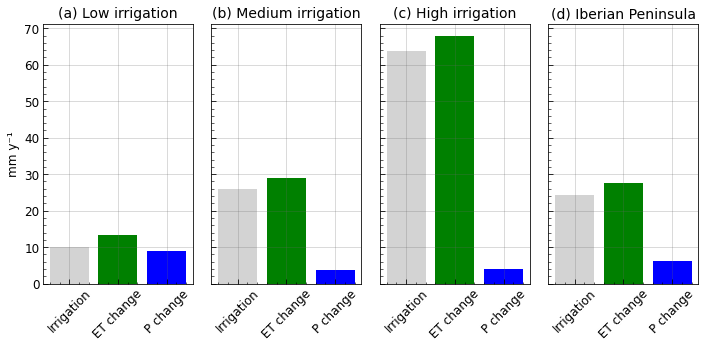

In [244]:
plot_side_by_side_barplots(irrZone_df_peryear)

# Tables

## Table 1 : gridded products
Not made using Python

## Tab 2 : discharge stations

In [245]:
#make csv from proper_stations_dict
filename='../../../obs/stations_data.csv'
df = pd.DataFrame(proper_stations_dict).T
df.to_csv(filename)

## Tab 3 : Change in evaluated metrics

In [254]:
#compute all metrics on one station (necessary for later automatic use of metrics)
station_id, station = next(iter(proper_stations_dict.items()))
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    metric_value=compute_metric_station(routing_noirr, obs_routing, station_id, station, metric_to_use)
    print('{} for station {} : {}'.format(metric_to_use.__short_name__, station['name'], metric_value))

Module (sim, m³/s) for station Tortosa : 650.92
Module (obs, m³/s) for station Tortosa : 287.6099853515625
Bias (m³/s) for station Tortosa : 363.31
RMSE for station Tortosa : 486.32
r for station Tortosa : 0.69
NSE for station Tortosa : -2.71
KGE for station Tortosa : -0.5


In [267]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=routing_noirr
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=proper_stations_dict
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    label='{} ({})'.format(station['station_nb'],station['name'])
    df.append({'Station':label})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs_routing, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_noirr=pd.DataFrame(df)
# set Station as index
df_noirr.set_index('Station', inplace=True)
df_noirr['Bias (%)'] = np.round(df_noirr['Bias (m³/s)'] / df_noirr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_noirr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_noirr = df_noirr[cols]
#add average row
df_noirr.loc['Mean'] = df_noirr.mean()
df_noirr.drop('Module (sim, m³/s)', axis=1, inplace=False)

Module (obs, m³/s)  Bias (m³/s)    Bias (%)        RMSE  \
Station                                                                         
1 (Tortosa)                   287.609985      363.310  126.300000  486.320000   
2 (Zaragoza)                  210.889999       58.250   27.600000  114.570000   
3 (Castejon)                  201.339996       61.840   30.700000  126.200000   
4 (Seros)                      52.750000      126.740  240.300000  204.820000   
5 (Fraga)                      49.689999       95.990  193.200000  180.910000   
6 (Tore)                      109.180000       40.250   36.900000  103.350000   
7 (Peral De Arlanza)           16.440001        6.690   40.700000   17.950000   
8 (Talavera)                   46.770000       71.290  152.400000  115.120000   
9 (Trillo)                     12.700000        7.720   60.800000   34.230000   
10 (Peralejos)                  3.870000       -1.340  -34.600000    3.300000   
11 (Azud de Badajoz)           81.830002       74.040   90.500000  152.240000   
12 (Pulo do Lobo)              25.230000       72.480  287.300000  101.120000   
13 (La Cubeta)                  3.370000       -0.360  -10.700000    3.950000   
14 (Villarubia)                 0.820000        1.250  152.400000    3.400000   
15 (Quintanar)                  0.710000        2.220  312.700000    3.800000   
16 (Mengibar)                  30.250000        5.880   19.400000   80.830000   
17 (Arroyo Maria)               6.190000       -2.190  -35.400000    6.400000   
18 (Pinos Puente)               1.000000        0.270   27.000000    1.610000   
Mean                           63.368881       54.685   95.416667   96.673333   

                             r        NSE       KGE  
Station                                              
1 (Tortosa)           0.690000  -2.710000 -0.500000  
2 (Zaragoza)          0.920000   0.750000  0.700000  
3 (Castejon)          0.910000   0.680000  0.630000  
4 (Seros)             0.450000 -32.120000 -3.600000  
5 (Fraga)             0.430000 -47.800000 -4.660000  
6 (Tore)              0.680000   0.290000  0.510000  
7 (Peral De Arlanza)  0.740000   0.320000  0.510000  
8 (Talavera)          0.500000 -10.170000 -1.540000  
9 (Trillo)            0.230000  -9.040000 -1.370000  
10 (Peralejos)        0.630000   0.270000  0.430000  
11 (Azud de Badajoz)  0.610000   0.100000  0.000000  
12 (Pulo do Lobo)     0.290000  -3.410000 -1.990000  
13 (La Cubeta)        0.530000   0.010000  0.510000  
14 (Villarubia)       0.480000  -3.350000 -1.010000  
15 (Quintanar)        0.800000 -27.500000 -4.140000  
16 (Mengibar)         0.070000  -4.180000 -0.460000  
17 (Arroyo Maria)     0.330000  -0.570000  0.240000  
18 (Pinos Puente)     0.710000   0.490000  0.550000  
Mean                  0.555556  -7.663333 -0.843889

In [265]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=routing_irr
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=proper_stations_dict
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    label='{} ({})'.format(station['station_nb'],station['name'])
    df.append({'Station':label})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs_routing, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_irr=pd.DataFrame(df)
# set Station as index
df_irr.set_index('Station', inplace=True)
df_irr['Bias (%)'] = np.round(df_irr['Bias (m³/s)'] / df_irr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_irr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_irr = df_irr[cols]
#add average row
df_irr.loc['Mean'] = df_irr.mean()
df_irr.drop('Module (obs, m³/s)', axis=1, inplace=False).drop('Module (sim, m³/s)', axis=1, inplace=False)

Bias (m³/s)    Bias (%)        RMSE         r  \
Station                                                               
1 (Tortosa)            297.420000  103.400000  447.990000  0.720000   
2 (Zaragoza)            24.190000   11.500000   99.560000  0.930000   
3 (Castejon)            43.150000   21.400000  124.370000  0.920000   
4 (Seros)              120.100000  227.700000  206.480000  0.430000   
5 (Fraga)               89.320000  179.800000  184.180000  0.420000   
6 (Tore)                -0.220000   -0.200000   86.570000  0.770000   
7 (Peral De Arlanza)     5.780000   35.200000   17.390000  0.750000   
8 (Talavera)            44.820000   95.800000  102.640000  0.580000   
9 (Trillo)               7.580000   59.700000   34.490000  0.260000   
10 (Peralejos)          -1.470000  -38.000000    3.360000  0.640000   
11 (Azud de Badajoz)    28.080000   34.300000  130.530000  0.660000   
12 (Pulo do Lobo)       40.870000  162.000000   82.380000  0.320000   
13 (La Cubeta)          -1.220000  -36.200000    4.180000  0.520000   
14 (Villarubia)          0.500000   61.000000    3.280000  0.450000   
15 (Quintanar)           1.060000  149.300000    3.120000  0.800000   
16 (Mengibar)           -5.120000  -16.900000   77.180000  0.080000   
17 (Arroyo Maria)       -2.940000  -47.500000    6.940000  0.290000   
18 (Pinos Puente)       -0.030000   -3.000000    1.520000  0.740000   
Mean                    38.437222   55.516667   89.786667  0.571111   

                            NSE       KGE  
Station                                    
1 (Tortosa)           -2.150000 -0.370000  
2 (Zaragoza)           0.810000  0.800000  
3 (Castejon)           0.690000  0.660000  
4 (Seros)            -32.660000 -3.690000  
5 (Fraga)            -49.580000 -4.880000  
6 (Tore)               0.500000  0.760000  
7 (Peral De Arlanza)   0.360000  0.550000  
8 (Talavera)          -7.880000 -1.380000  
9 (Trillo)            -9.190000 -1.420000  
10 (Peralejos)         0.240000  0.420000  
11 (Azud de Badajoz)   0.340000  0.510000  
12 (Pulo do Lobo)     -1.930000 -0.820000  
13 (La Cubeta)        -0.110000  0.390000  
14 (Villarubia)       -3.060000 -0.480000  
15 (Quintanar)       -18.190000 -3.160000  
16 (Mengibar)         -3.720000 -0.370000  
17 (Arroyo Maria)     -0.850000  0.140000  
18 (Pinos Puente)      0.550000  0.670000  
Mean                  -6.990556 -0.648333

In [274]:
df_diff=df_irr-df_noirr
df_diff['Bias change (%)'] = np.round(df_diff['Bias (m³/s)'] / df_noirr['Bias (m³/s)'], 3) * 100
df_diff['RMSE change (%)'] = np.round(df_diff['RMSE'] / df_noirr['RMSE'], 4) * 100
df_diff.drop('Module (obs, m³/s)', axis=1, inplace=True)
df_diff.drop('Module (sim, m³/s)', axis=1, inplace=True)
df_diff.drop('Bias (m³/s)', axis=1, inplace=True)
df_diff.drop('Bias (%)', axis=1, inplace=True)
df_diff.drop('RMSE', axis=1, inplace=True)
# df_diff.loc['Mean'] = df_diff.mean()
df_diff

r       NSE       KGE  Bias change (%)  \
Station                                                               
1 (Tortosa)           0.030000  0.560000  0.130000            -18.1   
2 (Zaragoza)          0.010000  0.060000  0.100000            -58.5   
3 (Castejon)          0.010000  0.010000  0.030000            -30.2   
4 (Seros)            -0.020000 -0.540000 -0.090000             -5.2   
5 (Fraga)            -0.010000 -1.780000 -0.220000             -6.9   
6 (Tore)              0.090000  0.210000  0.250000           -100.5   
7 (Peral De Arlanza)  0.010000  0.040000  0.040000            -13.6   
8 (Talavera)          0.080000  2.290000  0.160000            -37.1   
9 (Trillo)            0.030000 -0.150000 -0.050000             -1.8   
10 (Peralejos)        0.010000 -0.030000 -0.010000              9.7   
11 (Azud de Badajoz)  0.050000  0.240000  0.510000            -62.1   
12 (Pulo do Lobo)     0.030000  1.480000  1.170000            -43.6   
13 (La Cubeta)       -0.010000 -0.120000 -0.120000            238.9   
14 (Villarubia)      -0.030000  0.290000  0.530000            -60.0   
15 (Quintanar)        0.000000  9.310000  0.980000            -52.3   
16 (Mengibar)         0.010000  0.460000  0.090000           -187.1   
17 (Arroyo Maria)    -0.040000 -0.280000 -0.100000             34.2   
18 (Pinos Puente)     0.030000  0.060000  0.120000           -111.1   
Mean                  0.015556  0.672778  0.195556            -29.7   

                      RMSE change (%)  
Station                                
1 (Tortosa)                     -7.88  
2 (Zaragoza)                   -13.10  
3 (Castejon)                    -1.45  
4 (Seros)                        0.81  
5 (Fraga)                        1.81  
6 (Tore)                       -16.24  
7 (Peral De Arlanza)            -3.12  
8 (Talavera)                   -10.84  
9 (Trillo)                       0.76  
10 (Peralejos)                   1.82  
11 (Azud de Badajoz)           -14.26  
12 (Pulo do Lobo)              -18.53  
13 (La Cubeta)                   5.82  
14 (Villarubia)                 -3.53  
15 (Quintanar)                 -17.89  
16 (Mengibar)                   -4.52  
17 (Arroyo Maria)                8.44  
18 (Pinos Puente)               -5.59  
Mean                            -7.12

In [263]:
#export to csv to in latex
df_noirr.to_csv('figures/df_noirr.csv')
df_irr.to_csv('figures/df_irr.csv')
df_diff.to_csv('figures/df_diff.csv')

## Tab 4 : Subdomains of different irrigation intensity


Areas (computed here) and mean irrigation (see Fig.9)

Thresholds defined in Fig.9 as well, 0.05 mm/d and 0.1 mm/d

```
irr_mask_low    = ip_ORCirr.mean(dim='time')['irrigation']<0.05
irr_mask_high   = ip_ORCirr.mean(dim='time')['irrigation']>0.1
irr_mask_med    = (~irr_mask_low) * (~irr_mask_high) * ip_mask
```

In [264]:
ds_area= compute_grid_cell_width(ip_ORCirr)

mask1=irr_mask_low
mask_area_low=compute_mask_area(ds_area, mask1)

mask2=irr_mask_med
mask_area_med=compute_mask_area(ds_area, mask2)

mask3=irr_mask_high
mask_area_high=compute_mask_area(ds_area, mask3)

Area :  252794570000.0 m²


KeyboardInterrupt: 